In [1]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
    

In [2]:
path = '../dataset/iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
x, y = data[range(4)], data[4]
y = pd.Categorical(y).codes
x = x[[0, 1]]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, train_size=0.6)

In [3]:
# 分类器
print('----rbf kernel----')
clf_rbf = svm.SVC(C=0.8, kernel='rbf', gamma=20, decision_function_shape='ovr')
clf_rbf.fit(x_train, y_train.ravel())

# 准确率
print(clf_rbf.score(x_train, y_train))  # 精度
print('%s%f' %('训练集准确率：', accuracy_score(y_train, clf_rbf.predict(x_train))))
print(clf_rbf.score(x_test, y_test))
print('%s%.2f' %('测试集准确率：', accuracy_score(y_test, clf_rbf.predict(x_test))))

# decision_function
print('%s%s' %('decision_function:\n', clf_rbf.decision_function(x_train)))
print('%s%s' %('\npredict:\n', clf_rbf.predict(x_train)))

----rbf kernel----
0.866666666667
训练集准确率：0.866667
0.65
测试集准确率：0.65
decision_function:
[[ 2.45540648  0.80337522 -0.2587817 ]
 [-0.4368348   2.31950945  1.11732536]
 [-0.43793789  1.00917055  2.42876733]
 [ 2.45555373  0.80242493 -0.25797866]
 [ 2.46185007  0.80020899 -0.26205906]
 [-0.4275673   0.97215049  2.4554168 ]
 [ 2.4554096   0.80344613 -0.25885573]
 [-0.42578192  2.23549613  1.19028579]
 [-0.33298947  0.85928729  2.47370219]
 [-0.48605671  1.11023326  2.37582345]
 [-0.46698316  2.45555939  1.01142377]
 [-0.34393526  0.88836411  2.45557115]
 [-0.45654511  2.24846454  1.20808056]
 [ 2.45540023  0.80337522 -0.25877545]
 [-0.26186033  2.455375    0.80648533]
 [-0.43948259  1.07549979  2.3639828 ]
 [-0.4275673   0.97215049  2.4554168 ]
 [-0.31788553  2.45549167  0.86239386]
 [-0.27857189  0.80842625  2.47014564]
 [-0.34853299  2.45530975  0.89322324]
 [ 2.44451224  0.80934383 -0.25385607]
 [ 2.48392766  0.78928739 -0.27321505]
 [ 2.36830493  0.84753105 -0.21583598]
 [-0.34393526  0.

In [4]:
# 分类器
print('----linear kernel----')
clf_linear = svm.SVC(C=0.1, kernel='linear', decision_function_shape='ovr')
clf_linear.fit(x_train, y_train.ravel())

# 准确率
print(clf_linear.score(x_train, y_train))  # 精度
print('%s%.2f' %('训练集准确率：', accuracy_score(y_train, clf_linear.predict(x_train))))
print(clf_linear.score(x_test, y_test))
print('%s%.2f' %('测试集准确率：', accuracy_score(y_test, clf_linear.predict(x_test))))

# decision_function
print('%s%s' %('decision_function:\n', clf_linear.decision_function(x_train)))
print('%s%s' %('\npredict:\n', clf_linear.predict(x_train)))

----linear kernel----
0.8
训练集准确率：0.80
0.8
测试集准确率：0.80
decision_function:
[[ 2.22976777  0.93523902 -0.16500679]
 [-0.12204492  2.11891317  1.00313176]
 [-0.23499985  1.11410221  2.12089764]
 [ 2.16897433  0.99886921 -0.16784355]
 [ 2.22326299  0.96255343 -0.18581642]
 [-0.23718865  1.07538094  2.16180772]
 [ 2.27755165  0.92623764 -0.20378929]
 [-0.14162089  1.05737818  2.08424271]
 [-0.20679194  1.04356584  2.1632261 ]
 [-0.26977418  1.06847477  2.20129941]
 [-0.07644985  2.07119052  1.00525933]
 [-0.23937746  1.03665967  2.20271779]
 [-0.11772895  1.05287749  2.06485146]
 [ 2.21888538 -0.11488911  0.89600373]
 [-0.23931582  2.18013788  1.05917794]
 [-0.22849507  1.0867878   2.14170727]
 [-0.23718865  1.07538094  2.16180772]
 [ 1.01480194  2.11922344 -0.13402538]
 [-0.1438097   1.01865691  2.12515278]
 [-0.07426104  2.10991179  0.96434926]
 [ 2.1320112  -0.08547949  0.95346829]
 [ 2.16028075  0.98746236 -0.14774311]
 [ 2.24058852 -0.15811106  0.91752255]
 [-0.23937746  1.03665967  2.2

In [5]:
# 画图
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
x1, x2 = np.mgrid[x1_min:x1_max:500j, x2_min:x2_max:500j]  # 生成网格采样点
grid_test = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
print('%s%s' %('grid_test = \n', grid_test))
Z = clf_linear.decision_function(grid_test)    # 样本到决策面的距离
print('\n%s%s' %('distance to decision_function of linear kernel:\n', Z))
Z_fbf = clf_rbf.decision_function(grid_test)    # 样本到决策面的距离
print('\n%s%s' %('distance to decision_function of rbf kernel:\n', Z_fbf))


grid_test = 
[[ 4.3         2.        ]
 [ 4.3         2.00480962]
 [ 4.3         2.00961924]
 ..., 
 [ 7.9         4.39038076]
 [ 7.9         4.39519038]
 [ 7.9         4.4       ]]

distance to decision_function of linear kernel:
[[ 2.09427809  1.0935808  -0.18785889]
 [ 2.09478315  1.09305217 -0.18783532]
 [ 2.09528821  1.09252355 -0.18781175]
 ..., 
 [-0.24898506  0.9428012   2.30618387]
 [-0.24848     0.94227257  2.30620743]
 [-0.24797494  0.94174394  2.306231  ]]

distance to decision_function of rbf kernel:
[[-0.02248787  2.04243623  0.98005163]
 [-0.02092291  2.04165431  0.9792686 ]
 [-0.01929329  2.04084007  0.97845322]
 ..., 
 [-0.04903923  2.05568979  0.99334945]
 [-0.04903923  2.05568979  0.99334945]
 [-0.04903923  2.05568979  0.99334945]]


In [6]:
grid_hat_rbf = clf_rbf.predict(grid_test)  # 预测分类值
grid_hat_rbf = grid_hat_rbf.reshape(x1.shape)  # 使之与输入的形状相同
grid_hat_linear = clf_linear.predict(grid_test)
grid_hat_linear = grid_hat_linear.reshape(x1.shape)

In [7]:
myfont = mpl.font_manager.FontProperties(fname='../fonts/simhei.ttf') #自定义字体
# mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False # 保存图片时'-' 可能为块

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])

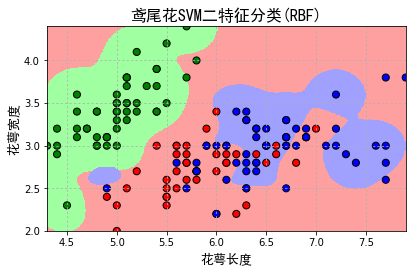

In [8]:
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, grid_hat_rbf, cmap=cm_light)
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)  # 样本
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)  # 圈中测试集样本
plt.xlabel(iris_feature[0], fontsize=13, fontproperties=myfont)
plt.ylabel(iris_feature[1], fontsize=13, fontproperties=myfont)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花SVM二特征分类(RBF)', fontsize=16, fontproperties=myfont)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)
plt.show()

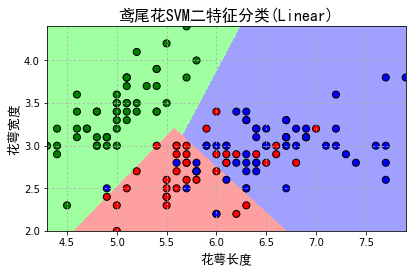

In [9]:
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, grid_hat_linear, cmap=cm_light)
plt.scatter(x[0], x[1], c=y, edgecolors='k', s=50, cmap=cm_dark)  # 样本
plt.scatter(x_test[0], x_test[1], s=120, facecolors='none', zorder=10)  # 圈中测试集样本
plt.xlabel(iris_feature[0], fontsize=13, fontproperties=myfont)
plt.ylabel(iris_feature[1], fontsize=13, fontproperties=myfont)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.title(u'鸢尾花SVM二特征分类(Linear)', fontsize=16, fontproperties=myfont)
plt.grid(b=True, ls=':')
plt.tight_layout(pad=1.5)
plt.show()